### Rewards

### Testing model trained using DDPG + HER + PER

In [2]:
%matplotlib inline
from tensorboard.backend.event_processing import event_accumulator
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings("ignore")
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

# function to open log and get reward
def getReward(log_dir):
    ea = event_accumulator.EventAccumulator(log_dir)
    ea.Reload()
    series = ea.scalars.Items('Reward')
    rewards = [s.value for s in series]
    df = pd.DataFrame(rewards, columns=['Reward'])
    df['MeanReward'] = df['Reward'].rolling(window=100, min_periods=2).mean()
    df['SD'] = df['Reward'].rolling(window=200, min_periods=2).std()
    return df

### Model trained for 4,000 episodes

INFO:tensorflow:No path found after ./FetchReach-v1_DDPG_HER_PER/train_2018-04-28-19/events.out.tfevents.1524958772.pi-ubt
INFO:tensorflow:No path found after ./FetchReach-v1_DDPG_HER_PER/train_2018-04-28-20/events.out.tfevents.1524961447.pi-ubt
INFO:tensorflow:No path found after ./FetchReach-v1_DDPG_HER_PER/test_2018-05-03-11/events.out.tfevents.1525360485.pi-ubt


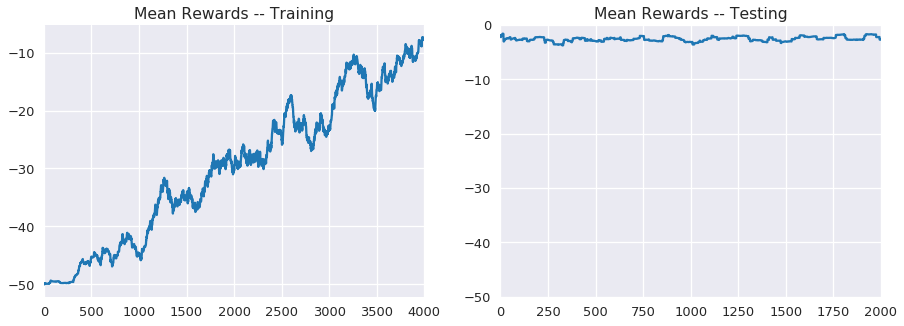

In [3]:
# load
log_dir = './FetchReach-v1_DDPG_HER_PER'
train_paths = [p for p in os.listdir(log_dir) if p.startswith('train_')]
train_paths.sort()
test_paths = [p for p in os.listdir(log_dir) if p.startswith('test_')]
test_paths.sort()

# look at first + second training sessions, first test session
df_train1 = getReward(os.path.join(log_dir, train_paths[0]))
df_train2 = getReward(os.path.join(log_dir, train_paths[1]))
df_train = pd.concat((df_train1, df_train2), ignore_index=True)
df_test = getReward(os.path.join(log_dir, test_paths[0]))

# recompute training reward after concatenation
df_train['MeanReward'] = df_train['Reward'].rolling(window=100, min_periods=2).mean()
df_train['SD'] = df_train['Reward'].rolling(window=200, min_periods=2).std()

# plot reward
sns.set_style('darkgrid')
sns.set_context("talk")
f, axs = plt.subplots(1, 2, figsize=(15, 5))
sns.tsplot(df_train['MeanReward'], ax=axs[0])
sns.tsplot(df_test['MeanReward'], ax=axs[1])
axs[0].set_title('Mean Rewards -- Training')
axs[1].set_title('Mean Rewards -- Testing')

plt.ylim(-50, 0)
plt.show()

### Histogram of Rewards in Testing Data (with vs. without PER)

INFO:tensorflow:No path found after ./FetchReach-v1_DDPG_HER/test_2018-05-03-13/events.out.tfevents.1525367467.pi-ubt
INFO:tensorflow:No path found after ./FetchReach-v1_DDPG_HER_PER/test_2018-05-03-11/events.out.tfevents.1525360485.pi-ubt


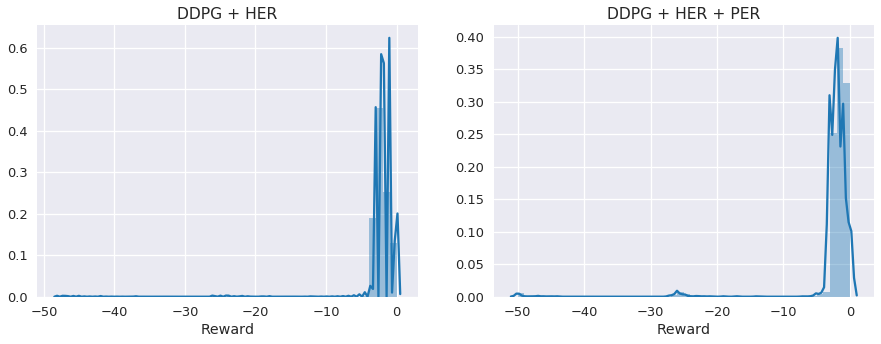

In [7]:
# load
log_dir = './FetchReach-v1_DDPG_HER'
test_paths = [p for p in os.listdir(log_dir) if p.startswith('test_')]
test_paths.sort()

log_dir_per = './FetchReach-v1_DDPG_HER_PER'
test_per_paths = [p for p in os.listdir(log_dir_per) if p.startswith('test_')]
test_per_paths.sort()

# look non-PER and PER testing sessions
df_test = getReward(os.path.join(log_dir, test_paths[1]))
df_test_per = getReward(os.path.join(log_dir_per, test_per_paths[0]))

# plot reward
sns.set_style('darkgrid')
sns.set_context("talk")
f, axs = plt.subplots(1, 2, figsize=(15, 5))
sns.distplot(df_test['Reward'], ax=axs[0])
sns.distplot(df_test_per['Reward'], ax=axs[1])
axs[0].set_title('DDPG + HER')
axs[1].set_title('DDPG + HER + PER')
plt.show()